# R Introduction 

## Part 1 - Language Basics

Most of the basic syntax is identical to python 

In [ ]:
# basic operations
7 + 5

[1] 12

In [ ]:
# Logical operations  
1 == 2
# you can try your own (see slides)


[1] FALSE

In [ ]:
# Functions (round brackets, arguments, ...)
log(124)

[1] 4.820282

In [ ]:
# assignment operator is quite scary 
a <- 10


In [ ]:
# but you can use = as well
b = 22

In [ ]:
# Inf, -Inf, NaM, NA


[1] NaN

In [ ]:
# strings are the same as python 

In [ ]:
# class() and mode() are like type() in python 

In [ ]:
# if statement
a <- 5
b <- 5
if (a == b)  {
  print("they're the same");
} else {
  print("They're not")
}


In [ ]:
# for loop 
for (element in LETTERS) {
  print(element)
}

## Part 2 - Data Structures

### Vectors - set of elements of same type 


In [ ]:
# we create vectors with c() 
# vectors - numpy arrays
# in python: a = np.array([1,2,3,4,5])
myVec <- c("me", "you", "she", "us")
# sequences can be useful 
# look at this
mySeq <- seq(-100, 100, 5)


[1] -100  -95  -90  -85  -80  -75  -70  -65  -60  -55  -50  -45  -40  -35  -30
[16]  -25  -20  -15  -10   -5    0    5   10   15   20   25   30   35   40   45
[31]   50   55   60   65   70   75   80   85   90   95  100

### Matrices - same as vectors - 2 dimensions

In [ ]:
myMat <- matrix(data = 1:100, nrow = 50, ncol = 2)
myMat


### Data Frame - we know what it is - quite similar to python 

In [ ]:
# let's have a look to the built-in iris data frame
class(iris)
# this is python 
# iris["Species"]
# this is R
iris$Species
# accessing a dataframe element iris[1,1]
# accessing a dataframe row iris[1,]
# accessing a dataframe column iris[,1]
# and so on...



### Factors - categorical variables

In [ ]:
class(iris$Species)

[1] "factor"

### Lists - set of elements - can be different types

In [ ]:
a <- 45
b <- "hi"
c <- iris
output <- list(age = a, word = b, data = c)

In [ ]:
iris

# Part 3 - let's play with R - How does the Classification Tree Training Algorithm work? 

# we can say that a classification tree looks for patterns to 
# group iris in "pure" groups
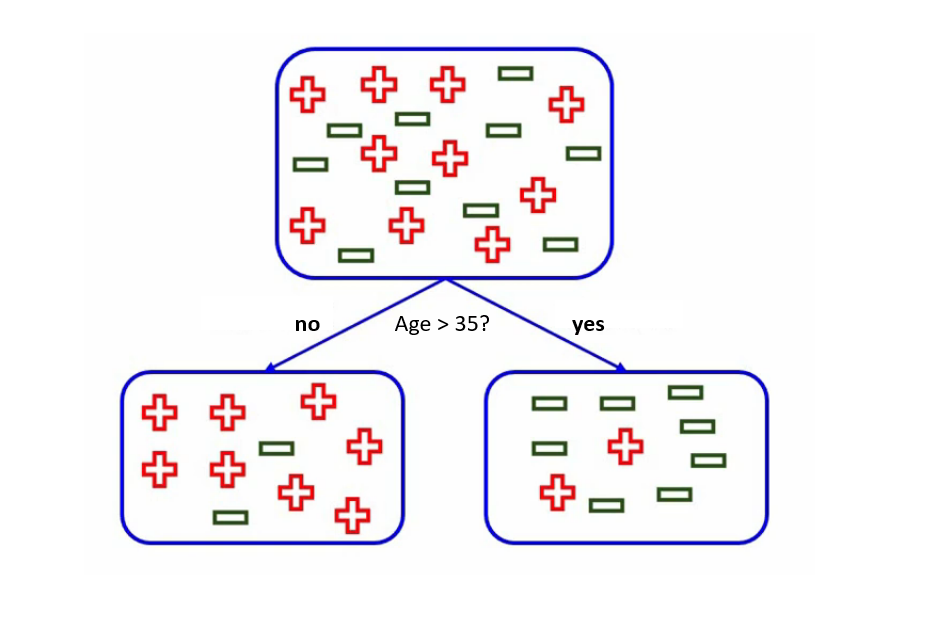

Tree based Techniques extract patterns in Tree-like form 

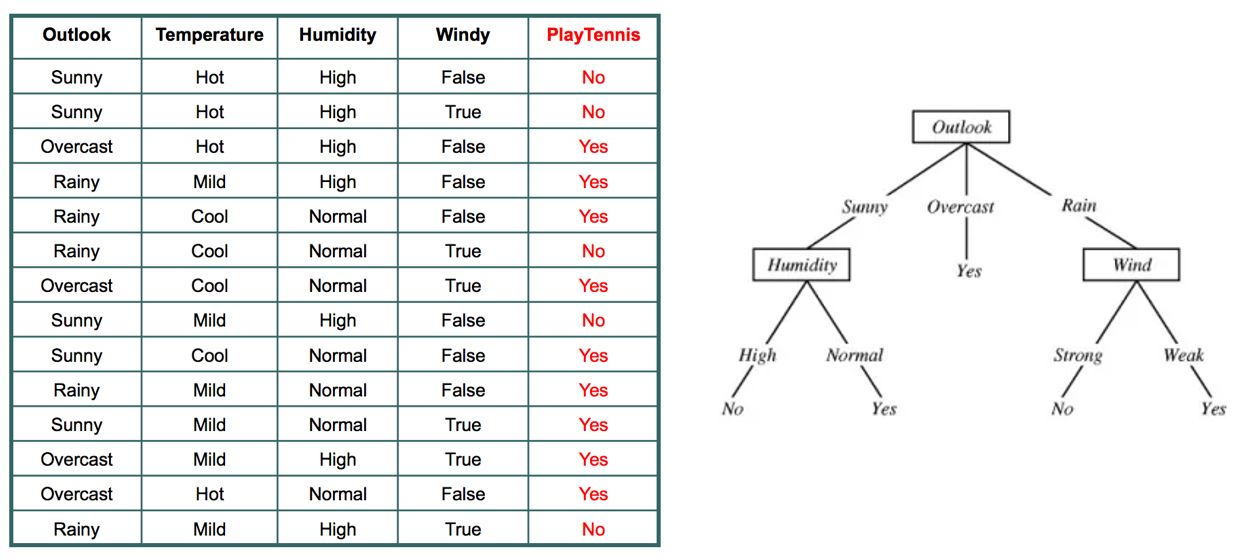

In [ ]:
# how do we import packages in R?
# in pyhton
# step 1: pip install pandas
# step 2: load package in memory - import pandas as pd
# step 3: use the package - pd.read_csv....
# in R
# importing packages
# different syntax - similar in the essence - no object oriented paradigm 
install.packages("mltools")
library(mltools)

In [ ]:
# we think in terms of impurity 
# it's computed on the target variable 
# we will use the mltools package
library(mltools)
# let's have a look at the Species "impurity"
gini_impurity(iris$Species)
# we can say that a classification tree looks for patterns to 
# group iris in "pure" groups
# Classification Tree Trainign Algorithms extract tree-shaped patterns 

[1] 0.6666667

In [ ]:
# let's have a look athe the iris dataset 
# sounds familiar?
head(iris)

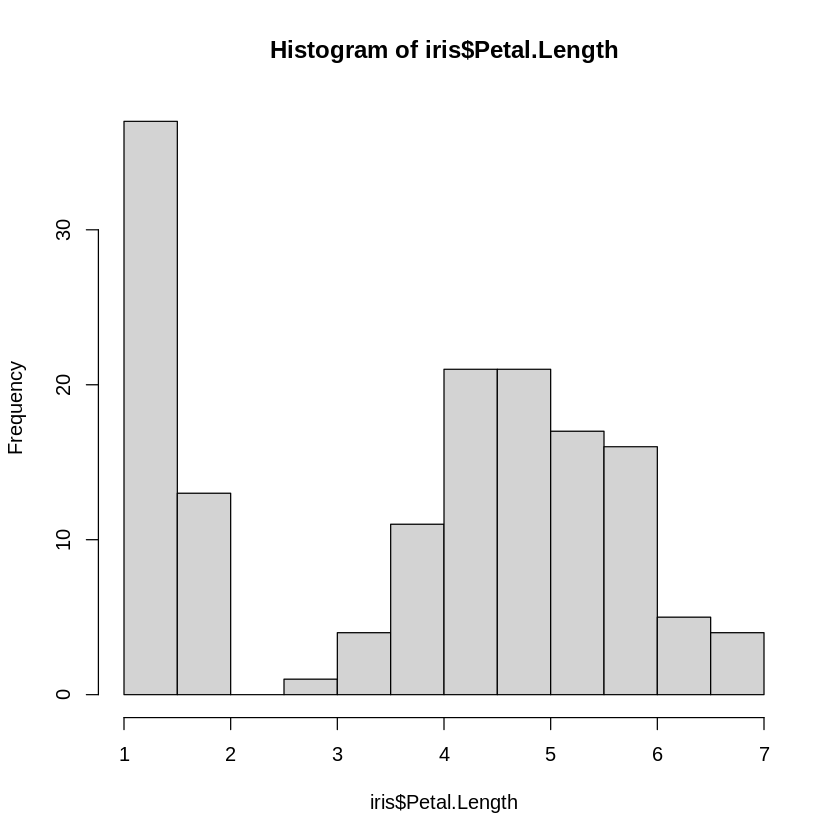

In [ ]:
# we want to find patterns that can help separating  species
# exploratory data analysis can help 
hist(iris$Petal.Length)

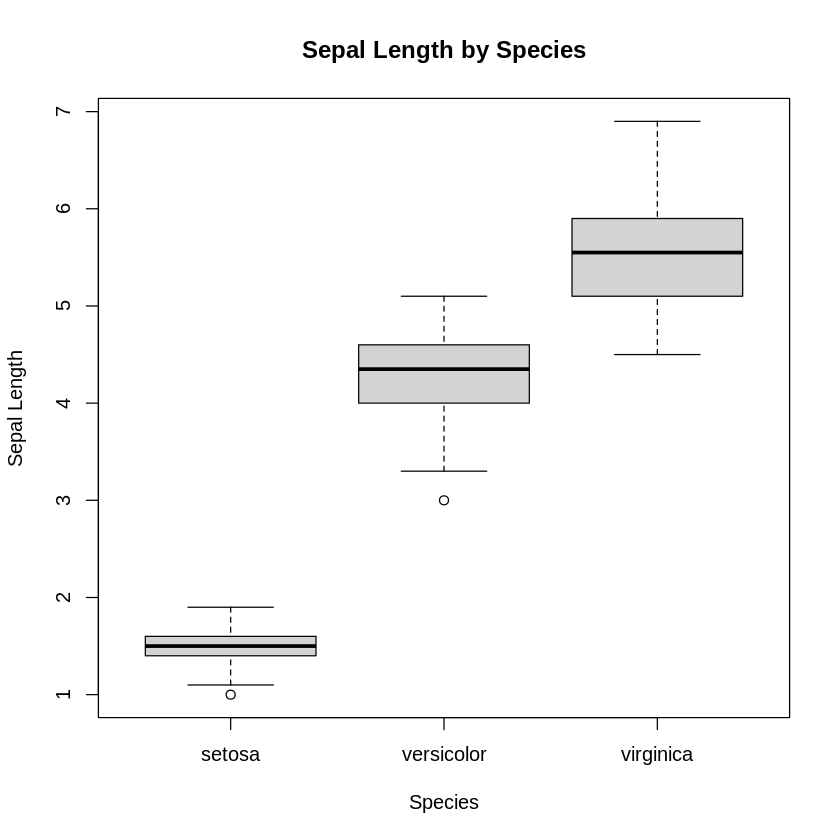

In [ ]:
# EDA: exploring the Petal.Length variable
boxplot(Petal.Length~Species,
        data=iris,
        main='Sepal Length by Species',
        xlab='Species',
        ylab='Sepal Length'
)
      

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



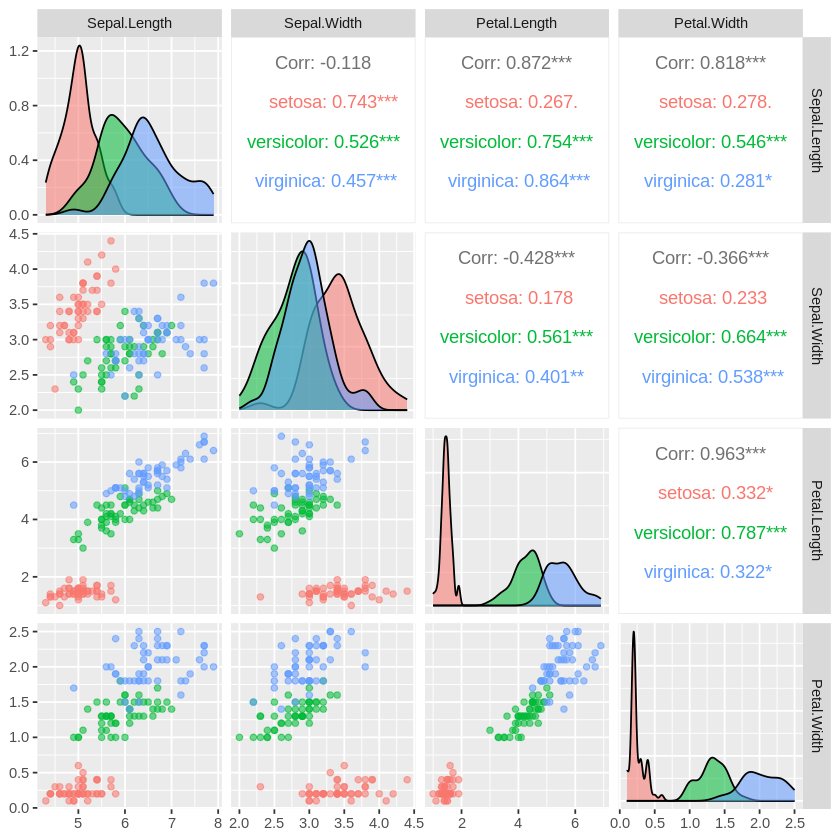

In [ ]:
# this evidence seems promising
# let's investigate a little more 
install.packages("GGally")
library(GGally)
ggpairs(iris, columns = 1:4, aes(color = Species, alpha = 0.5))

In [ ]:
# let's see what happens to mipurity if we separate the iris according to Petal.Length 
# step one: we split our data in two groups 
group_1 <- iris[iris$Petal.Length < 2.5,]
group_2 <- iris[iris$Petal.Length >= 2.5,]

In [ ]:
# step two: we compute impurity for each group
imp_1 <- gini_impurity(group_1$Species)
imp_2 <- gini_impurity(group_2$Species)

In [ ]:
# step 3: we check if we gained something
print("original impurity")
print(gini_impurity(iris$Species))
print("impurity left side of split 1")
print(imp_1)
print("impurity right side of split 1")
print(imp_2)


[1] "original impurity"
[1] 0.6666667
[1] "impurity left side of split 1"
[1] 0
[1] "impurity right side of split 1"
[1] 0.5


We can keep manually exploring the dataset looking for pattern but....
algorithms can do that for us

In [ ]:
# i can train a classification tree model
library(rpart)
mod <- rpart(Species~., data=iris )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



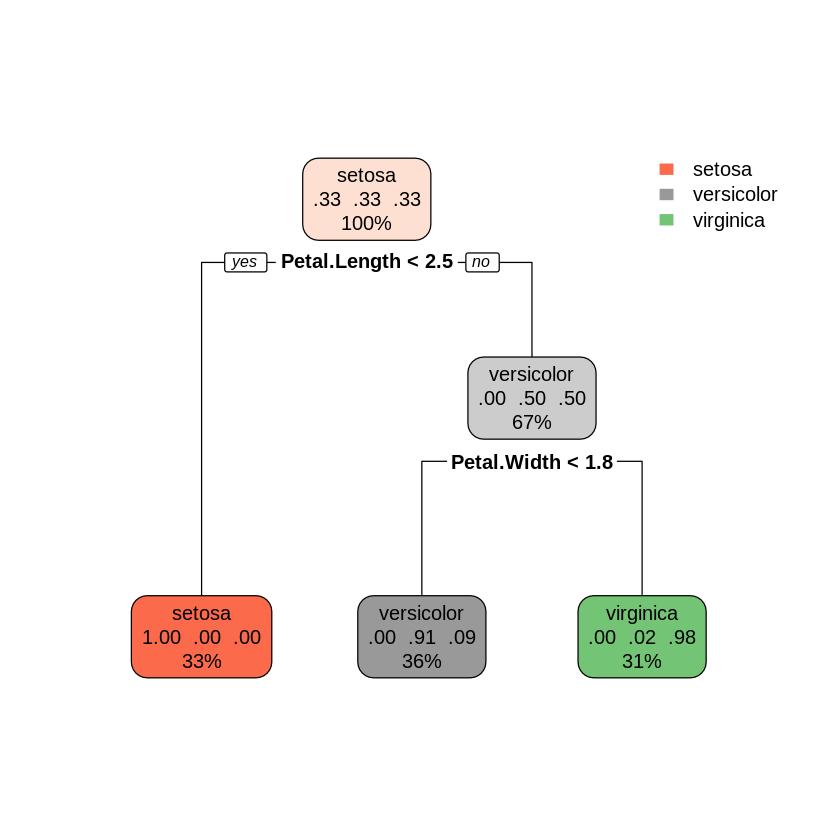

In [ ]:
# i can plot the model (there may be a package to install)
install.packages("rpart.plot")
library(rpart.plot)
rpart.plot(mod)